In [1]:
# importing necessary libraries and converting to suitable format
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv("cubic_dataset.csv", header=None)

In [3]:
# reading and converting to suitable format
file = file.to_numpy()
X = file[:, 0:-1]
Y = file[:, [-1]]

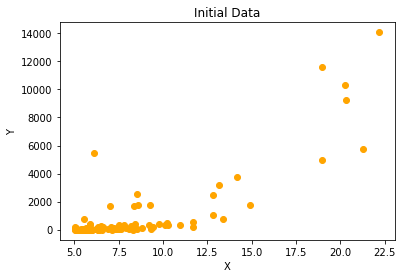

In [4]:
# Plotting
plt.scatter(X, Y, color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Initial Data")
plt.show()

In [5]:
def stick_column_of_one(x):
    n = x.shape[0]
    ones = np.ones((n,1))
    return np.hstack((ones, x))

In [6]:
# The gradient descent function for linear equations
def gradient_descent(X, Y, learning_rate, num_iters, degree=1):
    # normalization
    x_max = X.max(axis=0, keepdims=True)
    x_min = X.min(axis=0, keepdims=True)
    calc_x = (X - x_min) / (x_max - x_min)

    original_features = np.copy(calc_x)
    
    # appending higher powers
    for i in range(2, degree+1):
        calc_x = np.append(calc_x, original_features ** i, axis=1)   
        
    # Stacking column of 1s in front
    calc_x = stick_column_of_one(calc_x)
    
    n, d = calc_x.shape

    # theta
    theta = np.random.rand(d, 1)
    
    for i in range(num_iters):
        # calculate the current prediction
        prediction = np.matmul(calc_x, theta)
        # obtain the error
        error_vector = Y - prediction
        # Update the thetas. Here I've vectorized the operation of updating thetas
        theta = theta + (learning_rate/n) * np.matmul(np.transpose(calc_x), error_vector)

    
    def predict(x_predict, params=False):
        """x is a nxd dimensional array"""
        if (params):
            return theta
        # normalize
        x_c = (x_predict - x_min) / (x_max - x_min)
        original_features = np.copy(x_c)
        for i in range(2, degree+1):
            x_c = np.append(x_c, original_features ** i, axis=1)
        x_c = stick_column_of_one(x_c)
        return np.matmul(x_c, theta)
    
    return predict

In [7]:
predictor = gradient_descent(X, Y, 0.1, 5000, 3)

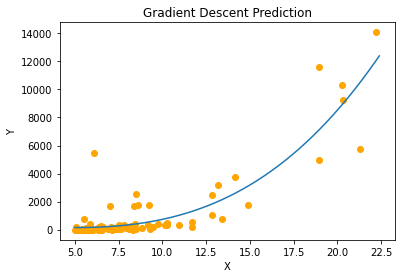

In [8]:
#Prepare to plot the prediction line
xs = np.arange(5, 22.5, 0.1)
num = xs.shape[0]
xs = xs.reshape((num, 1))
ys = predictor(xs)

plt.plot(xs, ys)
plt.scatter(X, Y, color="orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gradient Descent Prediction")
plt.show()

In [9]:
# ====================NORMAL EQUATIONS=====================

# Normal equation function. It returns suitable value for theta
def normal_equations(X, Y, degree):
    """Given X, Y and thetas, calculates optimal values of thetas"""
    x_max = X.max(axis=0, keepdims=True)
    x_min = X.min(axis=0, keepdims=True)
    x_calc = (X - x_min) / (x_max - x_min)

    original_features = np.copy(x_calc)

    # appending higher powers
    for i in range(2, degree+1):
        x_calc = np.append(x_calc, original_features ** i, axis=1)  

    x_calc = stick_column_of_one(x_calc)

    x_t = np.transpose(x_calc)
    intermediate = np.linalg.pinv(np.matmul(x_t, x_calc))
    theta = np.matmul(np.matmul(intermediate, x_t), Y)

    def predict(x_predict, params=False):
        """x is a nxd dimensional array"""
        if (params):
            return theta
        # normalize
        x_c = (x_predict - x_min) / (x_max - x_min)
        original_features = np.copy(x_c)
        for i in range(2, degree+1):
            x_c = np.append(x_c, original_features ** i, axis=1)
        x_c = stick_column_of_one(x_c)
        return np.matmul(x_c, theta)
        
    return predict

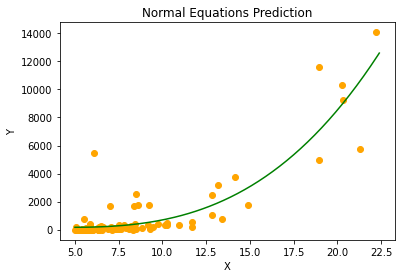

In [10]:
#Plotting the prediction curve
normeq_predictor = normal_equations(X, Y, 3)
ys2 = normeq_predictor(xs)
plt.plot(xs, ys2, color="green")
plt.scatter(X, Y, color="orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Normal Equations Prediction")
plt.show()